# Implementasi CNN: Klasifikasi Biner pada Gambar

In [62]:
# install:
#pip install numpy opencv-python matplotlib scikit-learn tensorflow keras seaborn

In [63]:
# Zip file operations
import zipfile

# Operating system interaction
import os

# Numerical operations and array manipulation
import numpy as np

# Computer vision tasks, image processing
import cv2

# Plotting and visualization
import matplotlib.pyplot as plt

# Dataset splitting
from sklearn.model_selection import train_test_split

# Machine learning framework for model development and training
import tensorflow as tf

# High-level interface for building neural networks
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, Dense
from tensorflow.keras.backend import clear_session
from keras.models import load_model

# Callbacks for model training
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Statistical visualization
import seaborn as sns
sns.set_style("whitegrid")

# Random seed for reproducibility
np.random.seed(0)

In [17]:
# Mengekstrak file zip
file = 'pistachio.zip'
zip_ref = zipfile.ZipFile(file, 'r') #r = read
zip_ref.extractall('')
zip_ref.close()
# Setelah diextract, hapus.

In [18]:
# Melihat isi direktori utama
main_dir = './'
# titik slash artinya di direktori yang sama dengan file ini.
os.listdir(main_dir)

['CNN 1&2.ipynb',
 'CNN-Praktek.ipynb',
 'data',
 'kirmizi',
 'pistachio.zip',
 'siirt']

In [19]:
# Masukkan ke folder data
# Melihat isi direktori 'dataset'
data_path = './data'
os.listdir(data_path)

['kirmizi', 'siirt']

In [20]:
# mendefinisikan beberapa variable
kategori = ['kirmizi', 'siirt'] #list kategori
img_data_list =[] #list kosong untuk menampung data pixel tiap gambar
img_label = [] #list kosong untuk menampung data label tiap gambar dalam bentuk numerik
label_map = {} #Dictionary kosong untuk memetakan label numerik ke label string

In [21]:
# Memberikan label untuk setiap gambarnya
for jenis in kategori:
    # Melihat isi folder setiap jenis:['kirmizi', 'siirt']
    img_list = os.listdir(data_path+'/'+jenis)

    # Membuat dictionary yang berisi label nuerik dan label string dari setiap jenis
    i = kategori.index(jenis)
    label_map[i] = str(jenis)

    # Perulangan untuk memasukkan semua file gambar ke dalam img_data_list, dan label 
    for img in img_list:
        input_img = cv2.imread(data_path+ '/'+ jenis + '/'+ img)
        input_img_resize = cv2.resize(input_img,(128, 128))
        img_data_list.append(input_img_resize)
        img_label.append(i)

In [22]:
label_map

{0: 'kirmizi', 1: 'siirt'}

In [23]:
img_data_list

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [29]:
# Mengubah img_data_list ke Numpy Array
img_data = np.array(img_data_list)
# Normalisasi Data = mengubah range dari intensiti pixel
img_data = img_data.astype('float')/255

# Mengubah img_label ke Numpy Array
img_label = np.array(img_label)

In [30]:
img_data

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [31]:
img_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

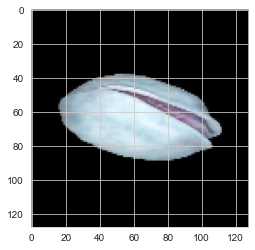

In [33]:
plt.imshow(img_data[1])
plt.show()

In [34]:
print('Label Numerik= ', img_label[1])
print('Nama Label= ',label_map[img_label[1]])

Label Numerik=  0
Nama Label=  kirmizi


In [35]:
print('Pixel Gambar: ')
img_data[1]

Pixel Gambar: 


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [36]:
X = img_data
Y = img_label

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
print('Ukuran Training Data: ', X_train.shape)
print('Ukuran Testing Data: ', X_test.shape)

Ukuran Training Data:  (572, 128, 128, 3)
Ukuran Testing Data:  (143, 128, 128, 3)


In [38]:
Y_train

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,

In [39]:
Y_test

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [42]:
from IPython.display import display, Markdown

# Define the model
model = keras.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    # MaxPooling Layer 1
    keras.layers.MaxPooling2D((2, 2)),
    
    # Convolutional Layer 2
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling Layer 2
    keras.layers.MaxPooling2D((2, 2)),
    
    # Convolutional Layer 3
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten Layer
    keras.layers.Flatten(),
    
    # Dense Layer 1
    keras.layers.Dense(128, activation='relu'),
    
    # Dense Layer 2 (Output Layer)
    keras.layers.Dense(1, activation='sigmoid')
])

# Display the summary of the model with explanations
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 50176)            

## Keterangan
# Model Architecture

1. **Convolutional Layer 1:**
    - `keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3))`
    - 32 adalah jumlah filter atau kernel yang digunakan di lapisan ini.

2. **MaxPooling Layer 1:**
    - `keras.layers.MaxPooling2D((2, 2))`

3. **Convolutional Layer 2:**
    - `keras.layers.Conv2D(64, (3, 3), activation='relu')`
    - 64 adalah jumlah filter atau kernel yang digunakan di lapisan ini.

4. **MaxPooling Layer 2:**
    - `keras.layers.MaxPooling2D((2, 2))`

5. **Convolutional Layer 3:**
    - `keras.layers.Conv2D(64, (3, 3), activation='relu')`
    - 64 adalah jumlah filter atau kernel yang digunakan di lapisan ini.

6. **Flatten Layer:**
    - `keras.layers.Flatten()`

7. **Dense Layer 1:**
    - `keras.layers.Dense(128, activation='relu')`
    - 128 adalah jumlah neuron dalam lapisan ini.

8. **Dense Layer 2 (Output Layer):**
    - `keras.layers.Dense(1, activation='sigmoid')`


## Training Model

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

Keterangan:  
- `optimizer='adam'`: Menggunakan algoritma optimasi Adam, yang merupakan algoritma populer untuk menyesuaikan laju pembelajaran secara adaptif.
- `loss='binary_crossentropy'`: Menggunakan fungsi kerugian binary crossentropy, yang cocok untuk tugas klasifikasi biner.
- `metrics=['accuracy']`: Model akan dievaluasi berdasarkan akurasi selama pelatihan dan evaluasi.

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=3)

- `EarlyStopping`: Mencegah pelatihan berlanjut jika tidak ada peningkatan yang signifikan dalam metrik yang diawasi.
- `monitor='val_loss'`: Memantau nilai kerugian pada set validasi.
- `mode='auto'`: Mode otomatis, di mana pelatihan akan dihentikan ketika 'val_loss' berhenti meningkat.
- `patience=3`: Menunggu 3 epoch tanpa peningkatan pada 'val_loss' sebelum menghentikan pelatihan.

In [43]:
history_aspek = model.fit(X_train, Y_train,
                        epochs = 30, 
                        callbacks = [es],
                        validation_split=0.2,
                        verbose = True # Verbose = 0 (tidak nampak progress), 1/True (progress bar), 2 (angka)
)

Epoch 1/30
15/15 [==============================] - 11s 575ms/step - loss: 0.6451 - accuracy: 0.6805 - val_loss: 0.4882 - val_accuracy: 0.7913
Epoch 2/30
15/15 [==============================] - 8s 514ms/step - loss: 0.4259 - accuracy: 0.8162 - val_loss: 0.4353 - val_accuracy: 0.8348
Epoch 3/30
15/15 [==============================] - 8s 549ms/step - loss: 0.3517 - accuracy: 0.8381 - val_loss: 0.4375 - val_accuracy: 0.8261
Epoch 4/30
15/15 [==============================] - 8s 547ms/step - loss: 0.2814 - accuracy: 0.8950 - val_loss: 0.3883 - val_accuracy: 0.8261
Epoch 5/30
15/15 [==============================] - 8s 539ms/step - loss: 0.2266 - accuracy: 0.9125 - val_loss: 0.4633 - val_accuracy: 0.8348
Epoch 6/30
15/15 [==============================] - 8s 533ms/step - loss: 0.1780 - accuracy: 0.9256 - val_loss: 0.5502 - val_accuracy: 0.8000
Epoch 7/30
15/15 [==============================] - 8s 548ms/step - loss: 0.1893 - accuracy: 0.9300 - val_loss: 0.4884 - val_accuracy: 0.8348


- `X_train` dan `Y_train`: Data pelatihan dan label.
- `epochs=30`: Jumlah epoch, yaitu seberapa banyak model akan melihat seluruh dataset pelatihan.
- `callbacks=[es]`: Menggunakan EarlyStopping callback untuk menghentikan pelatihan jika kriteria terpenuhi.
- `validation_split=0.2`: Menggunakan 20% dari data pelatihan sebagai set validasi.
- `verbose=True`: Menampilkan progress bar selama pelatihan.

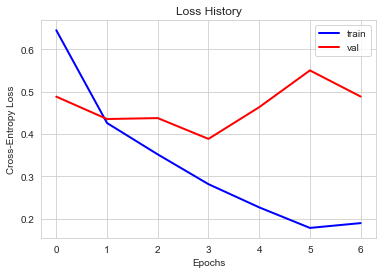

In [44]:
plt.figure()
plt.plot(history_aspek.history['loss'], lw=2.0, color='b', label='train')
plt.plot(history_aspek.history['val_loss'], lw=2.0, color='r', label='val')
plt.title("Loss History")
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

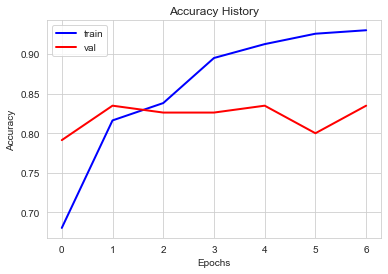

In [45]:
plt.figure()
plt.plot(history_aspek.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(history_aspek.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title("Accuracy History")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Testing Model

In [47]:
# Menggunakan model untuk membuat prediksi pada data uji
predictions = model.predict(X_test)

# Menampilkan hasil prediksi
print(predictions)

5/5 [==============================] - 1s 110ms/step
[[9.8078102e-02]
 [4.9892452e-01]
 [8.2078731e-01]
 [1.3170659e-05]
 [6.9540128e-02]
 [9.9868453e-01]
 [9.9336892e-01]
 [9.9977410e-01]
 [2.2496104e-02]
 [9.9838281e-01]
 [1.7005659e-06]
 [2.7854091e-01]
 [7.6883262e-01]
 [1.9710832e-03]
 [4.5720125e-03]
 [9.9876630e-01]
 [2.1591359e-04]
 [2.1465253e-02]
 [9.9157286e-01]
 [9.2429084e-01]
 [9.2435570e-04]
 [9.1094099e-02]
 [9.1958863e-01]
 [8.7177527e-01]
 [8.6138964e-01]
 [8.3330190e-03]
 [1.1170112e-04]
 [9.7465273e-03]
 [2.9626850e-04]
 [2.0783982e-01]
 [1.2988228e-01]
 [4.7486587e-04]
 [1.8782583e-01]
 [9.9432647e-01]
 [1.0182206e-08]
 [2.3719727e-01]
 [2.3584317e-01]
 [8.0819887e-01]
 [4.6783209e-01]
 [1.1062160e-05]
 [1.7782899e-03]
 [8.5354227e-01]
 [1.5855965e-01]
 [9.8766969e-04]
 [2.3172380e-01]
 [8.0257734e-05]
 [8.1235275e-04]
 [3.1537949e-03]
 [4.9872887e-03]
 [9.9310601e-01]
 [2.2621669e-02]
 [2.0370823e-04]
 [9.8072790e-02]
 [4.5848146e-01]
 [4.8439717e-01]
 [9.9010992e

In [51]:
# Menetapkan batas probabilitas
threshold = 0.5

# Mengonversi nilai probabilitas menjadi label kelas biner (0 atau 1)
predicted_labels = (predictions > threshold).astype(int).flatten()

# Menampilkan label yang diprediksi
print(predicted_labels)


[0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1
 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0]


### Contoh Hasil Prediksi Model

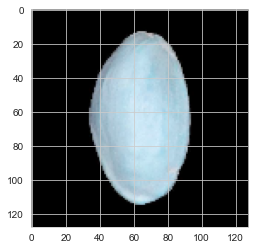

In [56]:
plt.imshow(X_test[23])
plt.show()

In [57]:
print('Label Numerik= ', Y_test[23])
print('Nama Label= ',label_map[Y_test[23]])

Label Numerik=  1
Nama Label=  siirt


In [58]:
print('Prediksi Label Numerik= ', predicted_labels[23])
print('Prediksi Nama Label= ',label_map[predicted_labels[23]])

Prediksi Label Numerik=  1
Prediksi Nama Label=  siirt


## Evaluasi

In [55]:
from sklearn.metrics import confusion_matrix

# Mendapatkan confusion matrix
conf_matrix = confusion_matrix(Y_test, predicted_labels)

# Mengekstrak nilai TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Menampilkan metrik evaluasi
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nMetrik Evaluasi:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Confusion Matrix:
[[73  7]
 [19 44]]

Metrik Evaluasi:
Accuracy: 0.8182
Precision: 0.8627
Recall: 0.6984
F1 Score: 0.7719


## Keterangan:
- True Positive (TP): 44 (Prediksi positif yang benar)
- True Negative (TN): 73 (Prediksi negatif yang benar)
- False Positive (FP): 7 (Prediksi negatif yang seharusnya positif)
- False Negative (FN): 19 (Prediksi positif yang seharusnya negatif)